In [1]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import sys
import os
import numpy as np
import math
import re

In [2]:
df = pd.read_csv("city_pairs.csv")
df

,Month,AustralianPort,ForeignPort,Country,Passengers_In,Freight_In_(tonnes),Mail_In_(tonnes),Passengers_Out,Freight_Out_(tonnes),Mail_Out_(tonnes),Passengers_Total,Freight_Total_(tonnes),Mail_Total_(tonnes),Year,Month_num
0,Jan-85,Adelaide,Auckland,New Zealand,1513,42.167,0.311,985,18.704,0.924,2498,60.871,1.235,1985,1
1,Jan-85,Adelaide,Bahrain,Bahrain,12,0.000,0.000,5,0.033,0.000,17,0.033,0.000,1985,1
2,Jan-85,Adelaide,Bombay,India,7,0.000,0.000,5,0.000,0.000,12,0.000,0.000,1985,1
3,Jan-85,Adelaide,Frankfurt,Germany,115,0.009,0.000,171,0.000,0.248,286,0.009,0.248,1985,1
4,Jan-85,Adelaide,London,UK,1567,2.800,0.000,1472,10.618,2.487,3039,13.418,2.487,1985,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84459,Sep-22,Sydney,Tokyo,Japan,9135,558.638,59.308,10573,659.217,29.100,19708,1217.855,88.408,2022,9
84460,Sep-22,Sydney,Vancouver,Canada,11790,263.357,15.870,11410,339.741,55.791,23200,603.098,71.661,2022,9
84461,Sep-22,Sydney,Wellington,New Zealand,8329,1.130,0.000,9258,4.521,0.000,17587,5.651,0.000,2022,9
84462,Sep-22,Sydney,Xiamen,China,1328,71.583,0.299,969,99.013,0.000,2297,170.596,0.299,2022,9


In [3]:
"""
for x in df.index:
    if df.loc[x, "Passengers_In"] == df.loc[x, "Passengers_Out"]:
        df.loc[x, "passenger_in_out"] = "SAME"
    elif df.loc[x, "Passengers_In"] > df.loc[x, "Passengers_Out"]:
        df.loc[x, "passenger_in_out"] = "IN"
    elif df.loc[x, "Passengers_In"] < df.loc[x, "Passengers_Out"]:
        df.loc[x, "passenger_in_out"] = "OUT"
    
    if df.loc[x, "Freight_In_(tonnes)"] == df.loc[x, "Freight_Out_(tonnes)"]:
        df.loc[x, "freight_in_out"] = "SAME"
    elif df.loc[x, "Freight_In_(tonnes)"] > df.loc[x, "Freight_Out_(tonnes)"]:
        df.loc[x, "freight_in_out"] = "IN"
    elif df.loc[x, "Freight_In_(tonnes)"] < df.loc[x, "Freight_Out_(tonnes)"]:
        df.loc[x, "freight_in_out"] = "OUT"
    
    if df.loc[x, "Mail_In_(tonnes)"] == df.loc[x, "Mail_Out_(tonnes)"]:
        df.loc[x, "mail_in_out"] = "SAME"
    elif df.loc[x, "Mail_In_(tonnes)"] > df.loc[x, "Mail_Out_(tonnes)"]:
        df.loc[x, "mail_in_out"] = "IN"
    elif df.loc[x, "Mail_In_(tonnes)"] < df.loc[x, "Mail_Out_(tonnes)"]:
        df.loc[x, "mail_in_out"] = "OUT"
"""
def question1_pass(column):
    if column["Passengers_In"] == column["Passengers_Out"]:
        return "SAME"
    elif column["Passengers_In"] > column["Passengers_Out"]:
        return "IN"
    elif column["Passengers_In"] < column["Passengers_Out"]:
        return "OUT"
def question1_freight(column):
    if column["Freight_In_(tonnes)"] == column["Freight_Out_(tonnes)"]:
        return "SAME"
    elif column["Freight_In_(tonnes)"] > column["Freight_Out_(tonnes)"]:
        return "IN"
    elif column["Freight_In_(tonnes)"] < column["Freight_Out_(tonnes)"]:
        return "OUT"
def question1_mail(column):
    if column["Mail_In_(tonnes)"] == column["Mail_Out_(tonnes)"]:
        return "SAME"
    elif column["Mail_In_(tonnes)"] > column["Mail_Out_(tonnes)"]:
        return "IN"
    elif column["Mail_In_(tonnes)"] < column["Mail_Out_(tonnes)"]:
        return "OUT"

df['passenger_in_out'] = df.apply(question1_pass, axis=1)
df['freight_in_out'] = df.apply(question1_freight, axis=1)
df['mail_in_out'] = df.apply(question1_mail, axis=1)
df

,Month,AustralianPort,ForeignPort,Country,Passengers_In,Freight_In_(tonnes),Mail_In_(tonnes),Passengers_Out,Freight_Out_(tonnes),Mail_Out_(tonnes),Passengers_Total,Freight_Total_(tonnes),Mail_Total_(tonnes),Year,Month_num,passenger_in_out,freight_in_out,mail_in_out
0,Jan-85,Adelaide,Auckland,New Zealand,1513,42.167,0.311,985,18.704,0.924,2498,60.871,1.235,1985,1,IN,IN,OUT
1,Jan-85,Adelaide,Bahrain,Bahrain,12,0.000,0.000,5,0.033,0.000,17,0.033,0.000,1985,1,IN,OUT,SAME
2,Jan-85,Adelaide,Bombay,India,7,0.000,0.000,5,0.000,0.000,12,0.000,0.000,1985,1,IN,SAME,SAME
3,Jan-85,Adelaide,Frankfurt,Germany,115,0.009,0.000,171,0.000,0.248,286,0.009,0.248,1985,1,OUT,IN,OUT
4,Jan-85,Adelaide,London,UK,1567,2.800,0.000,1472,10.618,2.487,3039,13.418,2.487,1985,1,IN,OUT,OUT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84459,Sep-22,Sydney,Tokyo,Japan,9135,558.638,59.308,10573,659.217,29.100,19708,1217.855,88.408,2022,9,OUT,OUT,IN
84460,Sep-22,Sydney,Vancouver,Canada,11790,263.357,15.870,11410,339.741,55.791,23200,603.098,71.661,2022,9,IN,OUT,OUT
84461,Sep-22,Sydney,Wellington,New Zealand,8329,1.130,0.000,9258,4.521,0.000,17587,5.651,0.000,2022,9,OUT,OUT,SAME
84462,Sep-22,Sydney,Xiamen,China,1328,71.583,0.299,969,99.013,0.000,2297,170.596,0.299,2022,9,IN,OUT,IN


In [4]:
#df2 = df.groupby('AustralianPort').sum()[['Passengers_In', 'Passengers_Out', 'Freight_In_(tonnes)', 'Freight_Out_(tonnes)', 'Mail_In_(tonnes)', 'Mail_Out_(tonnes)']]
#[PassengerInCount]
ausPort = pd.DataFrame(df, columns=['AustralianPort'])
ausPort = ausPort.drop_duplicates()
# passenger
grouped_df = df.groupby(['AustralianPort', 'passenger_in_out']).size().reset_index()
selected_df = pd.pivot_table(grouped_df, index = ['AustralianPort'],columns='passenger_in_out', fill_value=0).reset_index()
selected_df.columns = selected_df.columns.droplevel(0)
selected_df.columns = ['AustralianPort', 'PassengerInCount', 'PassengerOutCount', 'PassengerSameCount']
df2 = pd.merge(ausPort, selected_df[['AustralianPort', 'PassengerInCount', 'PassengerOutCount']], on='AustralianPort')
# freight
grouped_df = df.groupby(['AustralianPort', 'freight_in_out']).size().reset_index()
selected_df = pd.pivot_table(grouped_df, index = ['AustralianPort'],columns='freight_in_out', fill_value=0).reset_index()
selected_df.columns = selected_df.columns.droplevel(0)
selected_df.columns = ['AustralianPort', 'FreightInCount', 'FreightOutCount', 'FreightSameCount']
df2 = pd.merge(df2, selected_df[['AustralianPort', 'FreightInCount', 'FreightOutCount']], on='AustralianPort')
# mail
grouped_df = df.groupby(['AustralianPort', 'mail_in_out']).size().reset_index()
selected_df = pd.pivot_table(grouped_df, index = ['AustralianPort'],columns='mail_in_out', fill_value=0).reset_index()
selected_df.columns = selected_df.columns.droplevel(0)
selected_df.columns = ['AustralianPort', 'MailInCount', 'MailOutCount', 'MailSameCount']
df2 = pd.merge(df2, selected_df[['AustralianPort', 'MailInCount', 'MailOutCount']], on='AustralianPort')
df2 = df2.sort_values(by='PassengerInCount', ascending=False)
df2

,AustralianPort,PassengerInCount,PassengerOutCount,FreightInCount,FreightOutCount,MailInCount,MailOutCount
9,Sydney,10548,10994,12493,9112,9664,7225
5,Melbourne,7939,7311,7248,7591,6043,4457
1,Brisbane,6837,6686,3970,7201,2580,5348
7,Perth,4704,3604,2736,4341,2771,3671
2,Cairns,2986,3639,1585,3233,538,1553
0,Adelaide,2882,2718,1468,2462,490,1704
3,Darwin,2072,1889,1639,1194,341,717
16,Gold Coast,555,460,559,295,125,135
10,Townsville,293,332,94,212,0,1
13,Gold Coast/Coolangatta,291,211,55,27,0,0


In [5]:
def passInAve(column):
    return round(column['Passengers_In'] / numMonth, 2)
def passOutAve(column):
    return round(column['Passengers_Out'] / numMonth, 2)

def freInAve(column):
    return round(column['Freight_In_(tonnes)'] / numMonth, 2)
def freOutAve(column):
    return round(column['Freight_Out_(tonnes)'] / numMonth, 2)

def mailInAve(column):
    return round(column['Mail_In_(tonnes)'] / numMonth, 2)
def mailOutAve(column):
    return round(column['Mail_Out_(tonnes)'] / numMonth, 2)

numMonth = df.nunique().reset_index()
numMonth = numMonth.rename(columns = {0: 'num'})
numMonth = numMonth.iloc[0,1]
numSum = df.groupby('Country').sum().reset_index()
newdf = numSum[['Country', 'Passengers_In', 'Passengers_Out', 'Freight_In_(tonnes)', 'Freight_Out_(tonnes)', 'Mail_In_(tonnes)', 'Mail_Out_(tonnes)']]

ndf = newdf.copy()
ndf['Passengers_in_average'] = newdf.apply(passInAve,axis=1)
ndf['Passengers_out_average'] = newdf.apply(passOutAve,axis=1)

ndf['Freight_in_average'] = newdf.apply(freInAve,axis=1)
ndf['Freight_out_average'] = newdf.apply(freOutAve,axis=1)

ndf['Mail_in_average'] = newdf.apply(mailInAve,axis=1)
ndf['Mail_out_average'] = newdf.apply(mailOutAve,axis=1)

newdf.loc[:, 'Passengers_in_average'] = ndf['Passengers_in_average']
newdf.loc[:, 'Passengers_out_average'] = ndf['Passengers_out_average']
newdf.loc[:, 'Freight_in_average'] = ndf['Freight_in_average']
newdf.loc[:, 'Freight_out_average'] = ndf['Freight_out_average']
newdf.loc[:, 'Mail_in_average'] = ndf['Mail_in_average']
newdf.loc[:, 'Mail_out_average'] = ndf['Mail_out_average']
newdf = newdf[['Country', 'Passengers_in_average', 'Passengers_out_average', 'Freight_in_average', 'Freight_out_average', 'Mail_in_average', 'Mail_out_average']]
newdf = newdf.sort_values(by='Passengers_in_average', ascending=True)



/var/folders/v9/_cxsdqpn01l2fq_qlwcjt8mc0000gn/T/ipykernel_78091/1854453295.py:19: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  numSum = df.groupby('Country').sum().reset_index()
/var/folders/v9/_cxsdqpn01l2fq_qlwcjt8mc0000gn/T/ipykernel_78091/1854453295.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf.loc[:, 'Passengers_in_average'] = ndf['Passengers_in_average']
/var/folders/v9/_cxsdqpn01l2fq_qlwcjt8mc0000gn/T/ipykernel_78091/1854453295.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

In [6]:
nonZero = df
nonZero = nonZero.drop(index = nonZero[nonZero['Passengers_Out'] <= 0].index,axis=0)
#grouped = nonZero.groupby(['AustralianPort', 'Country', 'Month']).agg({'ForeignPort': pd.Series.nunique})
grouped = nonZero.groupby(['AustralianPort', 'Country', 'Month']).nunique()['ForeignPort'].reset_index()
grouped = grouped.drop(index = grouped[grouped['ForeignPort'] <= 1].index,axis=0)
df4 = grouped.groupby('Country').nunique()['Month'].reset_index().sort_values(by='Month', ascending=False)
df4 = df4.rename(columns={'Month': 'Unique_ForeignPort_Count'})
df4 = df4.head(5)
df4

,Country,Unique_ForeignPort_Count
16,USA,450
9,New Zealand,436
5,Indonesia,431
7,Japan,393
2,China,387


In [7]:
df = pd.read_csv("seats.csv")
df

,Month,In_Out,Australian_City,International_City,Airline,Route,Port_Country,Port_Region,Service_Country,Service_Region,Stops,All_Flights,Max_Seats,Year,Month_num
0,Sep-03,I,Adelaide,Denpasar,Garuda Indonesia,DPS-ADL-MEL,Indonesia,SE Asia,Indonesia,SE Asia,0,13,3809,2003,9
1,Sep-03,I,Adelaide,Hong Kong,Cathay Pacific Airways,HKG-ADL-MEL,Hong Kong (SAR),NE Asia,Hong Kong (SAR),NE Asia,0,8,2008,2003,9
2,Sep-03,I,Adelaide,Kuala Lumpur,Malaysia Airlines,KUL-ADL,Malaysia,SE Asia,Malaysia,SE Asia,0,17,4726,2003,9
3,Sep-03,I,Adelaide,Singapore,Qantas Airways,SIN-DRW-ADL-MEL,Singapore,SE Asia,Singapore,SE Asia,1,4,908,2003,9
4,Sep-03,I,Adelaide,Singapore,Qantas Airways,SIN-DRW-ADL-SYD,Singapore,SE Asia,Singapore,SE Asia,1,9,2038,2003,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110050,Sep-22,O,Sydney,Vancouver,Air Canada,SYD-YVR,Canada,N America,Canada,N America,0,33,10232,2022,9
110051,Sep-22,O,Sydney,Vancouver,Qantas Airways,SYD-YVR,Canada,N America,Canada,N America,0,13,3068,2022,9
110052,Sep-22,O,Sydney,Wellington,Air New Zealand,SYD-WLG,New Zealand,New Zealand,New Zealand,New Zealand,0,29,4686,2022,9
110053,Sep-22,O,Sydney,Wellington,Qantas Airways,SYD-WLG,New Zealand,New Zealand,New Zealand,New Zealand,0,42,7308,2022,9


In [8]:
def question5_source(column):
    if column['In_Out'] == 'I':
        return column['International_City']
    elif column['In_Out'] == 'O':
        return column['Australian_City']
def question5_des(column):
    if column['In_Out'] == 'I':
        return column['Australian_City']
    elif column['In_Out'] == 'O':
        return column['International_City']

df['Source_City'] = df.apply(question5_source, axis=1)
df['Destination_City'] = df.apply(question5_des, axis=1)

In [9]:
def aggFun(column):
    d = {}
    d['Max_Seats'] = column['Max_Seats'].sum()
    d['All_Flights'] = column['All_Flights'].sum()
    d['Num_Airlne'] = column['Airline'].nunique()
    d['Stop_Rate'] = ((column['Stops'] >= 1) * column['All_Flights'] ).sum() 
    return pd.Series(d, index = ['Max_Seats', 'All_Flights', 'Num_Airlne', 'Stop_Rate'])
def stopRate(column):
    if column['All_Flights'] > 0:
        return (column['Stop_Rate'] / column['All_Flights']) * 100
    else:
        return 0

grouped = df.groupby(['Source_City', 'Destination_City', 'Year', 'Month_num']).apply(aggFun).reset_index()
grouped['Stop_Rate%'] = grouped.apply(stopRate, axis=1)
df6 = grouped[['Source_City', 'Destination_City', 'Year', 'Month_num', 'Max_Seats', 'All_Flights', 'Num_Airlne', 'Stop_Rate%']]

In [10]:

dfCity_pairs = pd.read_csv('city_pairs.csv')
dfCity_pairs = dfCity_pairs.groupby(['Year', 'Month_num','Country']).sum()[['Passengers_In', 'Passengers_Out']].reset_index()
dfCity_pairs

/var/folders/v9/_cxsdqpn01l2fq_qlwcjt8mc0000gn/T/ipykernel_78091/2945368114.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfCity_pairs = dfCity_pairs.groupby(['Year', 'Month_num','Country']).sum()[['Passengers_In', 'Passengers_Out']].reset_index()


,Year,Month_num,Country,Passengers_In,Passengers_Out
0,1985,1,Bahrain,325,298
1,1985,1,Brunei,497,344
2,1985,1,Canada,1837,1341
3,1985,1,China,2429,2225
4,1985,1,Cyprus,57,0
...,...,...,...,...,...
16410,2022,9,UK,17489,17617
16411,2022,9,USA,74704,75430
16412,2022,9,United Arab Emirates,108368,103425
16413,2022,9,Vanuatu,4757,5432


In [11]:
dfSeats = pd.read_csv('seats.csv')
dfSeats = dfSeats.groupby(['Year', 'Month_num', 'Month', 'Port_Country', 'Port_Region', 'In_Out']).sum()['Max_Seats'].reset_index()
dfSeats = dfSeats.pivot_table(index = ['Year', 'Month_num', 'Month', 'Port_Country', 'Port_Region'],columns='In_Out', fill_value=0).reset_index()
dfSeats.columns = dfSeats.columns.droplevel(0)
dfSeats.columns = ['Year', 'Month_num', 'Month', 'Country', 'Port_Region', 'MaxSeats_In', 'MaxSeats_out']
dfSeats

/var/folders/v9/_cxsdqpn01l2fq_qlwcjt8mc0000gn/T/ipykernel_78091/671002552.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfSeats = dfSeats.groupby(['Year', 'Month_num', 'Month', 'Port_Country', 'Port_Region', 'In_Out']).sum()['Max_Seats'].reset_index()


,Year,Month_num,Month,Country,Port_Region,MaxSeats_In,MaxSeats_out
0,2003,9,Sep-03,Argentina,S America,1976,1976
1,2003,9,Sep-03,Austria,Europe,10320,10320
2,2003,9,Sep-03,Brunei,SE Asia,7342,7144
3,2003,9,Sep-03,Canada,N America,8455,8440
4,2003,9,Sep-03,Chile,S America,3367,3367
...,...,...,...,...,...,...,...
6856,2022,9,Sep-22,UK,Europe,35130,35062
6857,2022,9,Sep-22,USA,N America,84944,85100
6858,2022,9,Sep-22,United Arab Emirates,Middle East,109574,109218
6859,2022,9,Sep-22,Vanuatu,Islands,6864,6864


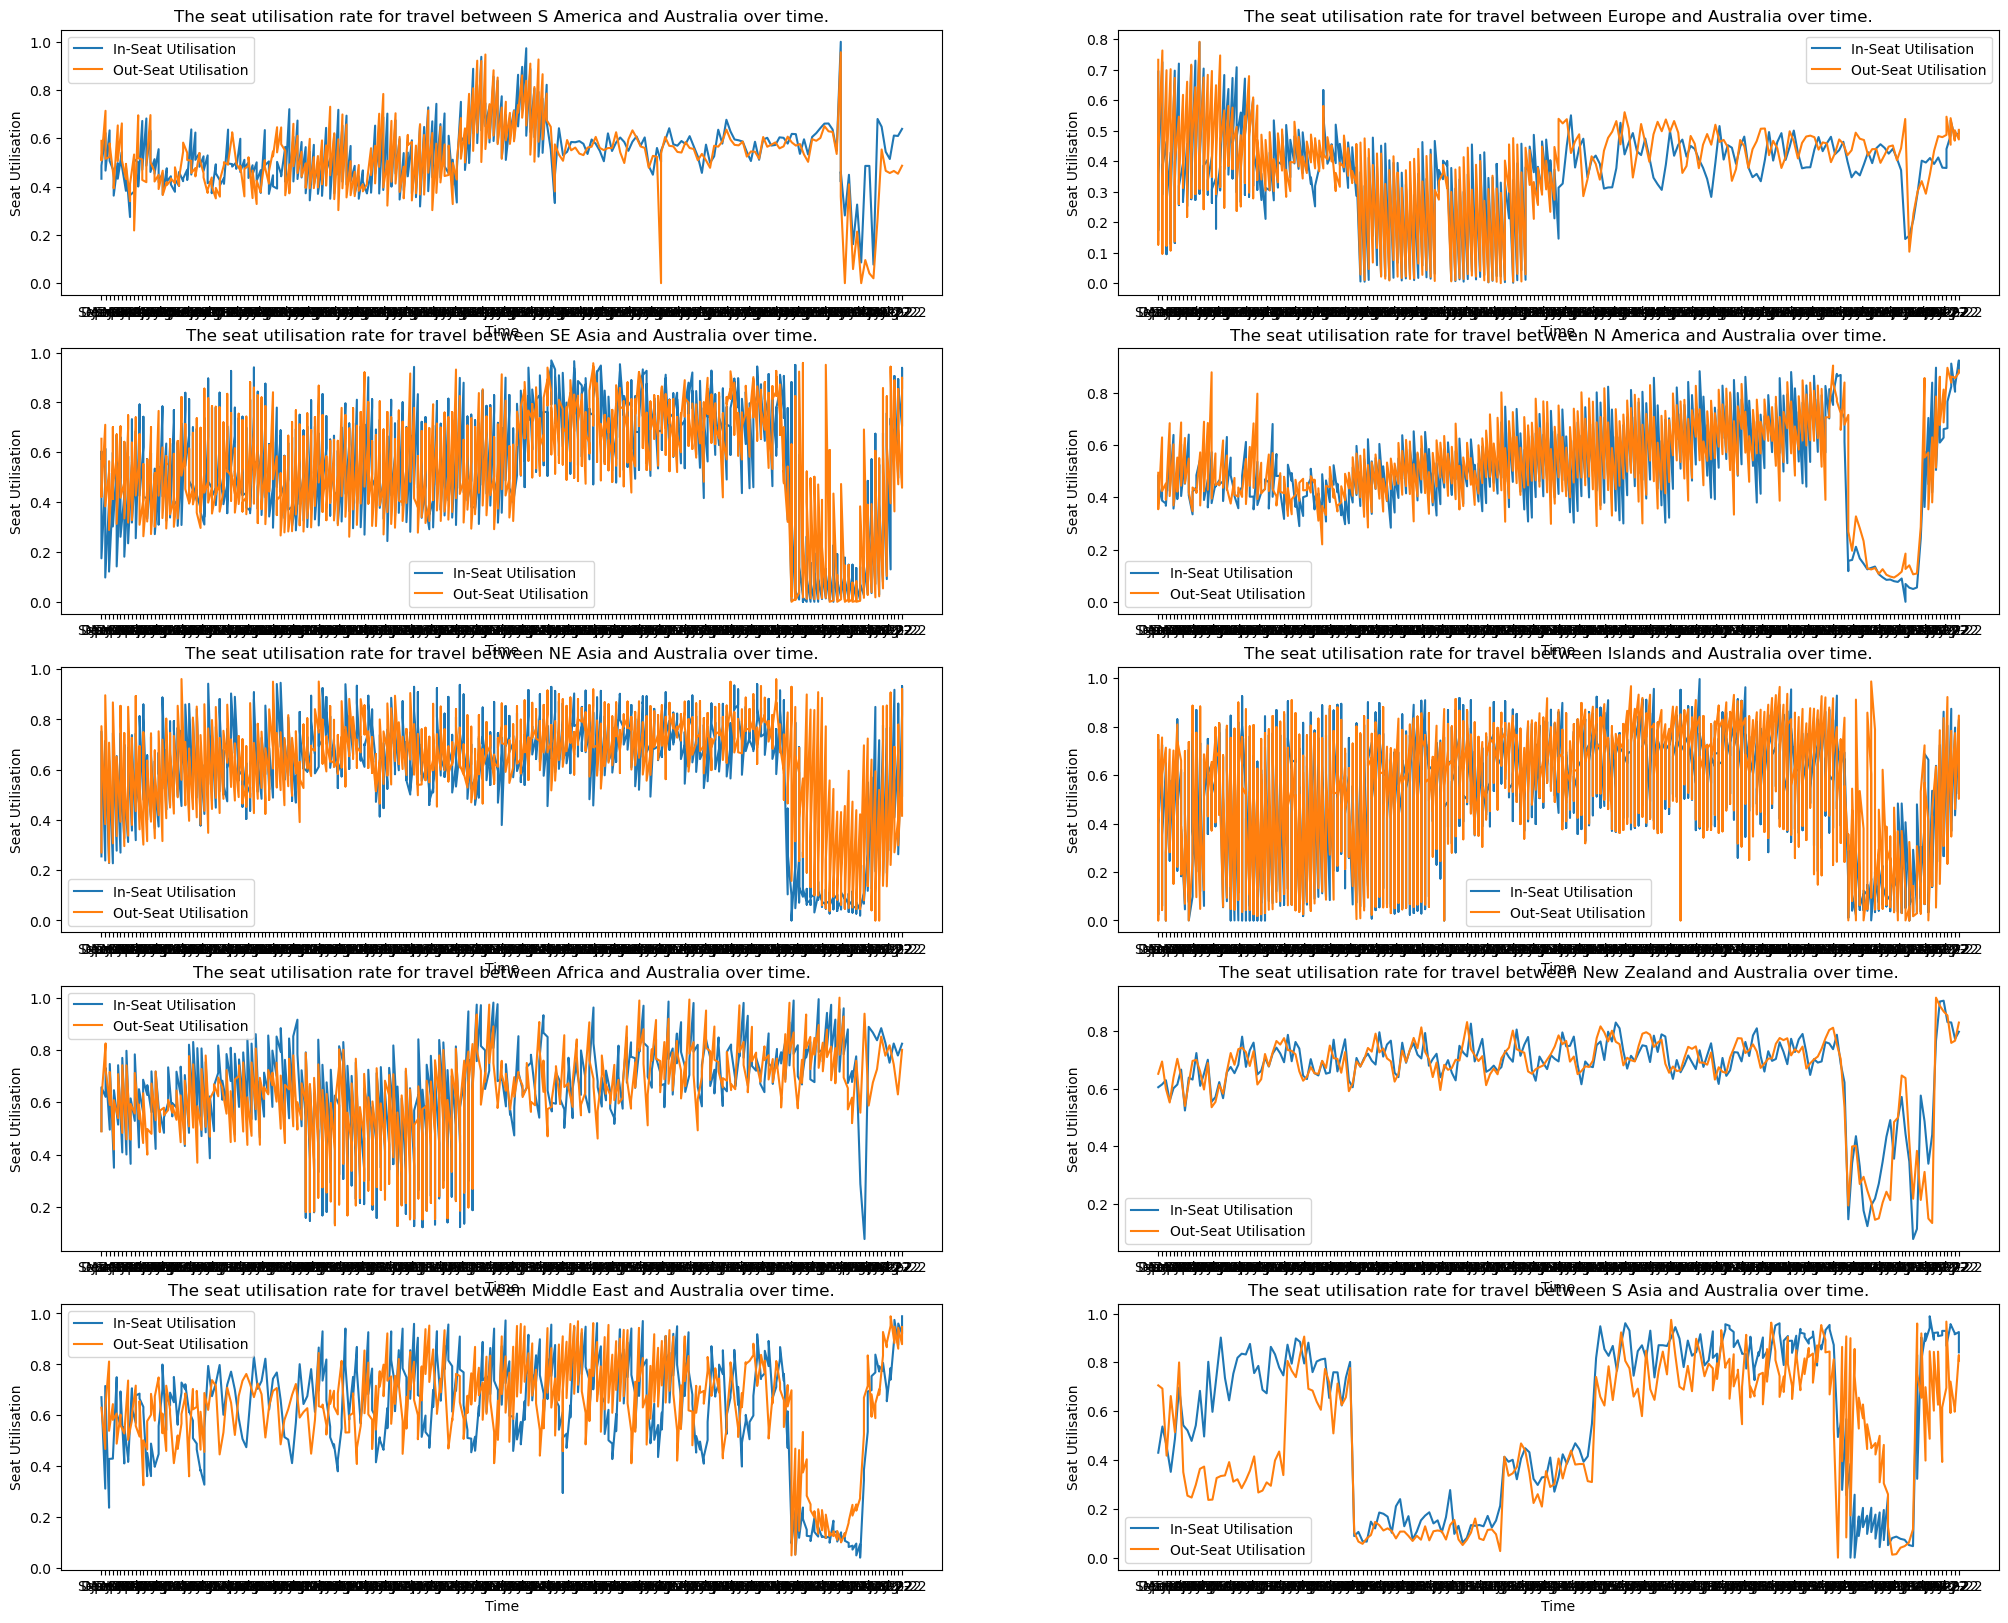

In [12]:
def inFun(column):
    if column['MaxSeats_In'] != 0:
        return column['Passengers_In'] / column['MaxSeats_In']
    else:
        return 0
def outFun(column):
    if column['MaxSeats_out'] != 0:
        return column['Passengers_Out'] / column['MaxSeats_out']
    else:
        return 0
combine = pd.merge(dfSeats, dfCity_pairs[['Year', 'Month_num', 'Country', 'Passengers_In', 'Passengers_Out']], on = ['Year', 'Month_num', 'Country'])
combine['in_seat_utilisation'] = combine.apply(inFun, axis=1)
combine['out_seat_utilisation'] = combine.apply(outFun, axis=1)
combine = combine[['Month', 'Port_Region', 'in_seat_utilisation', 'out_seat_utilisation']]

# list of region
regions = combine['Port_Region'].unique()
nrows = (len(regions) + 1) // 2
ncols = 2
# create subplots
fig, axs = plt.subplots(nrows, ncols, figsize=(25, 20))
#fig.subplots_adjust(hspace=0.5)
# Iterate through each region and plot in a separate subplot
for i, region in enumerate(regions):
    # Calculate the row and column indices for the current subplot
    row = i // ncols
    col = i % ncols
    
    # Filter the dataframe for the current region
    region_df = combine[combine["Port_Region"] == region]
    
    # Plot the line chart in the current subplot
    axs[row, col].plot(region_df["Month"], region_df["in_seat_utilisation"], label="In-Seat Utilisation")
    axs[row, col].plot(region_df["Month"], region_df["out_seat_utilisation"], label="Out-Seat Utilisation")
    axs[row, col].legend() # Place a legend on the Axes.
    axs[row, col].set_xlabel("Time")
    axs[row, col].set_ylabel("Seat Utilisation")
    axs[row, col].set_title( "The seat utilisation rate for travel between "+ region + " and Australia over time.")


# Save the figure
plt.savefig("z5320711_q7.png")
